In [9]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#for metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

from joblib import dump

In [10]:
df_data = pd.read_csv("../../generated_models/Binary_model/esme.csv")
df_data

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_1271,p_1272,p_1273,p_1274,p_1275,p_1276,p_1277,p_1278,p_1279,target
0,0.639281,-1.648714,0.334245,-0.950470,-0.450966,1.429406,-0.987936,-0.532019,0.118906,-0.913579,...,0.596625,-0.185024,0.256098,0.578565,-1.118087,1.822954,1.062010,1.349821,-1.858867,Positive
1,-0.296742,-1.309763,0.587979,-0.516738,-0.277881,1.019276,-1.160733,-0.470726,0.710901,-2.284438,...,-0.131670,-0.264150,1.006676,0.392704,-1.365836,2.354435,0.857890,-0.233402,-2.128175,Positive
2,-0.238964,-1.484793,0.295789,-0.790714,-0.186983,0.463369,-0.788450,0.043199,1.044328,-2.501017,...,-0.496723,-0.870659,1.071123,-0.292757,-1.299698,2.104408,0.097349,0.408147,-0.548659,Positive
3,-0.252682,-1.404306,0.669496,-0.514791,-0.217979,0.555304,-1.435047,-0.478273,0.279296,-1.798330,...,0.002082,0.079428,1.089866,0.029061,-1.167949,2.409534,1.069280,-0.220989,-2.055197,Positive
4,0.818708,-1.386219,0.747362,-0.872289,-0.377845,0.626837,-0.660958,0.033140,0.658455,-1.112496,...,0.028156,0.068839,1.111216,0.458930,-1.332752,1.611892,1.081370,0.562700,-2.584779,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42226,-0.495504,-0.687341,-0.532977,0.716170,-0.414306,0.521033,1.265709,-0.093395,1.970889,-1.598918,...,-0.184886,-0.676934,0.803635,0.845650,-0.728170,2.432549,1.392769,-0.365286,0.915889,Negative
42227,-1.199468,-0.610623,0.432082,-0.439052,-1.245875,1.498827,0.554623,-0.566940,-1.159345,-2.423163,...,-0.069399,-1.750422,0.098685,-0.474443,-0.775292,2.390108,-0.629594,-0.781779,0.290678,Negative
42228,0.339972,-1.117198,0.626234,0.472028,-0.226455,1.168683,1.284137,-0.222728,-0.183533,-1.207296,...,0.043227,0.222129,0.199354,0.436125,-1.298748,1.966827,0.406505,-1.055961,0.148064,Negative
42229,-0.785937,0.208387,0.757898,-0.282866,-0.825879,2.212211,0.221631,-0.976338,0.358735,-0.997440,...,-0.161010,0.325037,0.107422,0.279442,-0.217416,1.334828,0.774434,-0.174864,-0.668007,Negative


In [11]:
response = df_data['target']
df_to_train = df_data.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(df_to_train, response, random_state=42, test_size=0.3)

svc_model = SVC(
    kernel='poly',
    C=0.5111775990246927,
    degree=5,
    coef0=1.0606602144075188,
    probability=True
)

svc_model.fit(X=X_train, y=y_train)


SVC(C=0.5111775990246927, coef0=1.0606602144075188, degree=5, kernel='poly',
    probability=True)

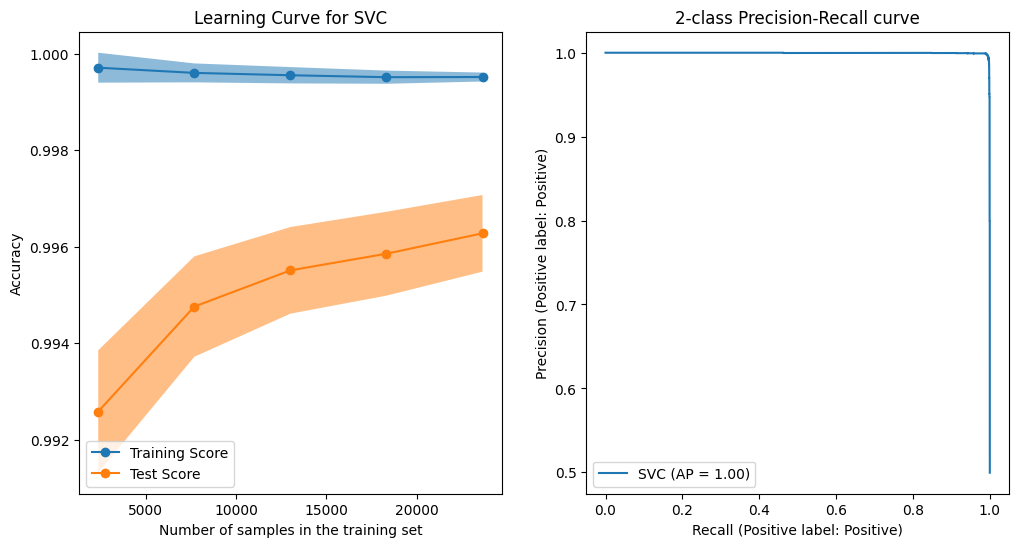

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

LearningCurveDisplay.from_estimator(svc_model, **common_params, ax=ax[0])
handles, label = ax[0].get_legend_handles_labels()
ax[0].legend(handles[:2], ["Training Score", "Test Score"])
ax[0].set_title(f"Learning Curve for {svc_model.__class__.__name__}")

display = PrecisionRecallDisplay.from_estimator(
    svc_model, X_test, y_test, name=svc_model.__class__.__name__, ax=ax[1])
_ = display.ax_.set_title("2-class Precision-Recall curve")


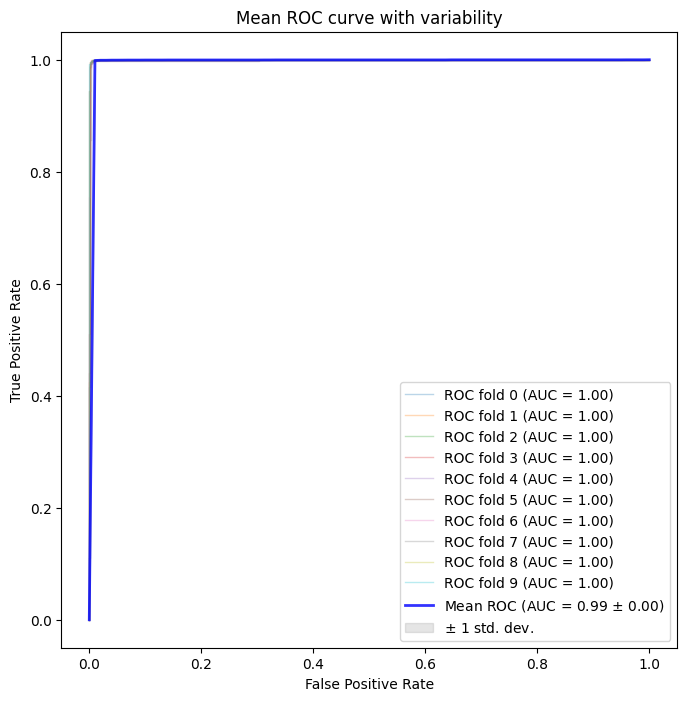

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

n_splits = 10
cv = StratifiedKFold(n_splits=n_splits)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for fold, (train, test) in enumerate(cv.split(X_train, y_train)):
    svc_model.fit(X_train.values[train], y_train.values[train])
    viz = RocCurveDisplay.from_estimator(
        svc_model,
        X_train.values[test],
        y_train.values[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Mean ROC curve with variability",
)
ax.axis("square")
ax.legend(loc="lower right")

In [14]:
dump(svc_model, "../../generated_models/Binary_model/svc_model.joblib")

['../../generated_models/Binary_model/svc_model.joblib']